In [1]:
import pandas as pd    #PANDA AS PD LIBRARI FOR OPERATING WITH TABLES


In [2]:

dataset=pd.read_csv("insurance_pre.csv")  #creating a variable called dataset ,which uses read_csv funtion from lib pd and saving the dataset in the file"50_Startups.csv"
dataset   #printing the dataset to check 

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset)  #storing the coloumn yearsofexpirience from the dataset to the variable independent

dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,True,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False
2,28,33.000,3,4449.46200,False,True,True,False
3,33,22.705,0,21984.47061,False,True,True,False
4,32,28.880,0,3866.85520,False,True,True,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False
1334,18,31.920,0,2205.98080,True,False,True,False
1335,18,36.850,0,1629.83350,True,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False


In [4]:
independent=dataset[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes']]  ##storing the colounm salary from the dataset to the variable independent
independent

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,True,False,False,True
1,18,33.770,1,False,True,True,False
2,28,33.000,3,False,True,True,False
3,33,22.705,0,False,True,True,False
4,32,28.880,0,False,True,True,False
...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False
1334,18,31.920,0,True,False,True,False
1335,18,36.850,0,True,False,True,False
1336,21,25.800,0,True,False,True,False


In [5]:
dependant=dataset[['charges']] #  #storing the colounm salary from the dataset to the variable independent
dependant

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
from sklearn.model_selection import  train_test_split  ##importing only "train_test_split" function from the lib " sklearn.model_selection" to allocate less space instead of importing the whole lib and allocating more space 
x_train,x_test,y_train,y_test=train_test_split(independent,dependant,test_size=0.30,random_state=0)  ##seperating the independent and dependent from the variables through"train_test_split" function ...test sixe ratio shpuld be  70:30 ...70 should be the train set and 30 should be the test set
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
1163,18,28.215,0,True,False,True,False
196,39,32.800,0,True,False,True,False
438,52,46.750,5,True,False,True,False
183,44,26.410,0,True,False,True,False
1298,33,27.455,2,False,True,True,False
...,...,...,...,...,...,...,...
763,27,26.030,0,False,True,True,False
835,42,35.970,2,False,True,True,False
1216,40,25.080,0,False,True,True,False
559,19,35.530,0,False,True,True,False


In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='poisson',max_depth=4)# CRITERION ANND SLPIITER IS SOME OF THE HYPER TUNNING PARAMETER
regressor = regressor.fit(x_train, y_train)

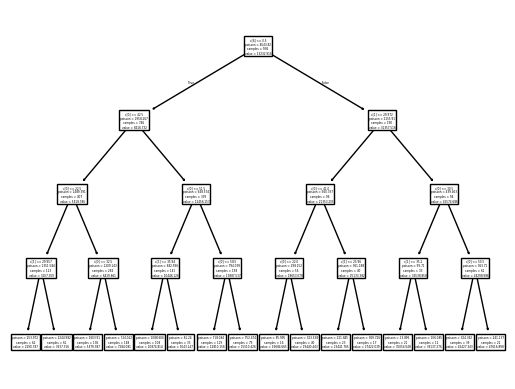

In [9]:
import matplotlib.pyplot as plt #TO IMPORT GRAPH FUNCTIONS 
from sklearn import tree
tree.plot_tree(regressor) 
plt.show()

In [10]:
y_pred=regressor.predict(x_test) #Creating a variable called "y_pred" to assign the output of the x_test through the predict function 
from sklearn.metrics import r2_score  #importing "r2_score" function from the lib "sklearn.metrics" which does the calculation of r2 value which tells the accuracy percent of te model
r_score=r2_score(y_test,y_pred)    #creating a variable  "r_score" to store the r2 value through "r2_score" function from the lib and passing the parameter  "y_test,y_pred" as input to compare the both output to give the r2 score value
r_score  

0.884713903308847